**Title: Air Passenger Forecasting - A Time Series Analysis**

**Introduction:**
Welcome to the "Air Passenger Forecasting - A Time Series Analysis" Kaggle competition! In this competition, we will delve into the captivating world of time series analysis to tackle a common challenge in the field of aviation and transportation – forecasting the number of passengers traveling by airplanes. Time series analysis is a powerful tool that enables us to uncover patterns, trends, and seasonality in sequential data. By leveraging historical information, we can make accurate predictions for the future, aiding airlines and airports in efficient resource allocation and planning.

**Aim:**
The primary goal of this competition is to develop predictive models that can forecast the number of passengers traveling via airplanes based on historical data. Participants will explore various time series analysis techniques, apply statistical tests, and select appropriate models to achieve accurate predictions. This competition mirrors a real-world scenario where airlines need to make informed decisions to accommodate passenger demand effectively.

**Dataset Attributes:**
The dataset includes two main attributes:
- **Month:** This attribute represents the month and year values for the data points.
- **#Passengers:** The number of passengers who traveled using airplanes during the specified month and year.

**Notebook Contents:**
To guide participants through this competition, we have structured the notebook into the following sections:
1. **Dataset Information:** An overview of the dataset, its structure, and initial exploration.
2. **Time Series Analysis:** A deep dive into time series concepts, including trend, seasonality, and stationarity. Participants will learn about statistical tests for time series analysis.
3. **Modeling:** Exploration of various modeling techniques with a focus on ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal ARIMA) models. Participants will learn how to select optimal model orders.
4. **Conclusion:** Summing up the insights gained from the analysis and showcasing the predictive power of the developed models.

**What You Will Learn:**
Participating in this competition, you will gain valuable insights and skills:
- Understanding the core principles of time series analysis.
- Conducting statistical tests to ensure accurate modeling.
- Selecting appropriate orders for ARIMA and SARIMA models.
- Performing in-sample and out-of-sample forecasting using both rolling and non-rolling methods.
- Distinguishing between the `forecast` function and the `predict` function for ARIMA and SARIMA models.

**Related Topic Notebooks:**
To further enhance your understanding of time series analysis, we recommend exploring the "Avocado Price Forecasting" notebook, which demonstrates the application of time series analysis techniques to forecast avocado prices using weekly data. This notebook serves as an excellent supplementary resource to sharpen your skills in time series forecasting.

Get ready to embark on a journey through the intricate yet fascinating realm of time series analysis as we predict future air passenger numbers together. Happy forecasting!

In [1]:
#################################
# Airline Passenger Forecasting
#################################

import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


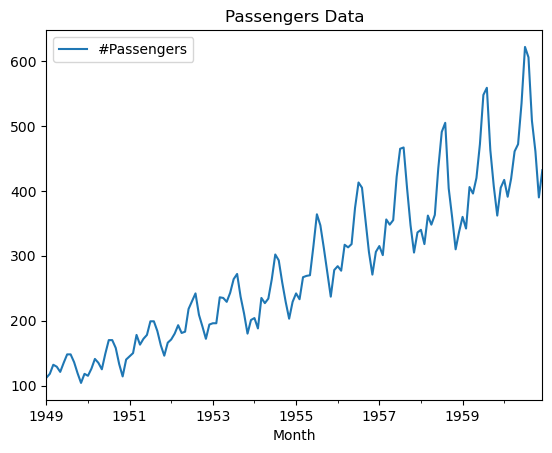

In [2]:
#################################
# Visualization of Data
#################################

df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv', index_col='Month', parse_dates=True)

df.shape
df.head()

df[['#Passengers']].plot(title='Passengers Data')
plt.show()

df.index

df.index.freq = "MS"

train = df[:120]
test = df[120:]

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


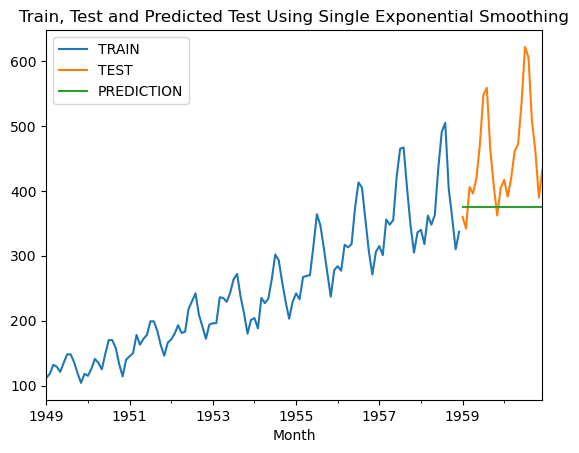

In [3]:
#################################
# Single Exponential Smoothing
#################################

def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)
# best_alpha: 0.11 best_mae: 82.528

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

def plot_prediction(y_pred, label):
    train["#Passengers"].plot(legend=True, label="TRAIN")
    test["#Passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

plot_prediction(y_pred, "Single Exponential Smoothing")

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5568
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9637
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8983
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

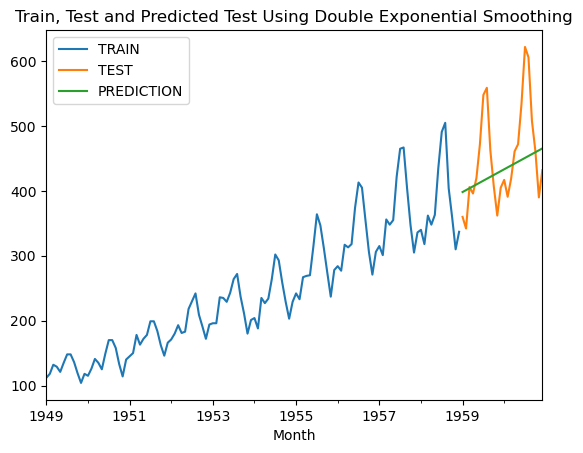

In [4]:
#################################
# Double Exponential Smoothing
#################################

def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=24)
# best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036

des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(24)

plot_prediction(y_pred, "Double Exponential Smoothing")


[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.76]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

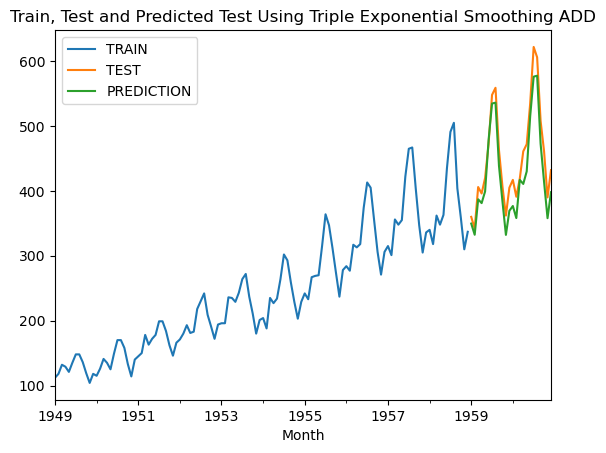

In [5]:
#################################
# Triple Exponential Smoothing (Holt-Winters)
#################################



def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=24)

# best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947

tes_model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(24)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")



In [6]:
# ##################################################
# # ARIMA(p, d, q): (Autoregressive Integrated Moving Average)
# ##################################################

# p = d = q = range(0, 4)
# pdq = list(itertools.product(p, d, q))


# def arima_optimizer_aic(train, orders):
#     best_aic, best_params = float("inf"), None
#     for order in orders:
#         try:
#             arma_model_result = ARIMA(train, order).fit(disp=0)
#             aic = arma_model_result.aic
#             if aic < best_aic:
#                 best_aic, best_params = aic, order
#             print('ARIMA%s AIC=%.2f' % (order, aic))
#         except:
#             continue
#     print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
#     return best_params

# best_params_aic = arima_optimizer_aic(train, pdq)

# arima_model = ARIMA(train, best_params_aic).fit(disp=0)
# y_pred = arima_model.forecast(24)[0]
# mean_absolute_error(test, y_pred)
# # 51.1806294123169


# plot_prediction(pd.Series(y_pred, index=test.index), "ARIMA")

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.6320531158312
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883429307
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.0696747520262
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.986585377873
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.3010979098003
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382610542
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.6113602789763
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.3620853403545
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.5942348893623
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695583002
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093046857
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.4998829549786
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.839720177014
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876022221
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.7261514439637
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229304
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

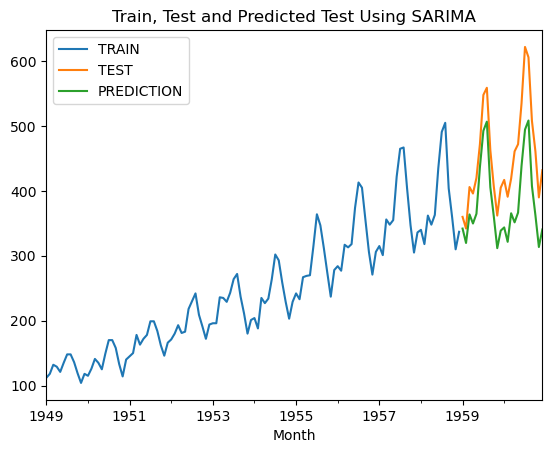

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.2095457532533
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972633845074
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93608404358334
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79704114448323
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.59973879995394
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.598430095393308
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.6732363260292
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.28978563277764
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252847732824
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.32051675444973
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48450818580226
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43292395658925
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.01388545090933
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.734758520392983
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368436557336
SARIMA(0, 1, 0)x(0, 1,

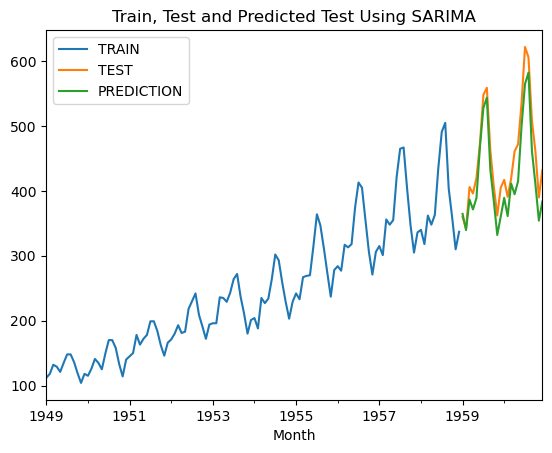

1961-01-01    450.286334
1961-02-01    429.302023
1961-03-01    475.721718
1961-04-01    502.017567
1961-05-01    516.825570
1961-06-01    579.037179
Freq: MS, dtype: float64

In [7]:
##################################################
# SARIMA
##################################################

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)

y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 68.57726545235921

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")


# MAE


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 30.623362595882828

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")



# Final model

tes_model_final = ExponentialSmoothing(df, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

tes_model_final.forecast(6)